<a href="https://colab.research.google.com/github/ifkmldk/portfolio/blob/main/KALBE_Regression_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Import Library
# dataframe
import pandas as pd
import numpy as np

# EDA/profiling
from ydata_profiling import ProfileReport

# Visualization
from google.colab import autoviz
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
df = pd.read_csv('/content/Dataset CCV 5 - Supervised Learning Regression - Dataset CCV 5 - Supervised Learning Regression.csv')

In [30]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("KALBE_Regression Test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Day                               31 non-null     int64  
 1   Diabetasol Coklat 1 kg            30 non-null     float64
 2   Fitbar Multigrain raisin 22 gram  30 non-null     float64
 3   Hydro Coco Original 500 ml        31 non-null     int64  
 4   Slim & Fit Milk 312 gr            28 non-null     float64
 5   Daily Sales                       31 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 KB


In [32]:
df.isnull().sum()

Day                                 0
Diabetasol Coklat 1 kg              1
Fitbar Multigrain raisin 22 gram    1
Hydro Coco Original 500 ml          0
Slim & Fit Milk 312 gr              3
Daily Sales                         0
dtype: int64

In [33]:
df.describe()

,Day,Diabetasol Coklat 1 kg,Fitbar Multigrain raisin 22 gram,Hydro Coco Original 500 ml,Slim & Fit Milk 312 gr,Daily Sales
count,31.000000,3.000000e+01,30.000000,3.100000e+01,2.800000e+01,3.100000e+01
mean,16.000000,7.650075e+06,203052.833333,5.852296e+05,2.784100e+06,1.452263e+07
std,9.092121,4.719969e+06,119893.843744,3.157644e+05,1.798318e+06,5.938896e+06
min,1.000000,6.946280e+05,56598.000000,3.374900e+04,2.419020e+05,2.847663e+06
25%,8.500000,4.046010e+06,117565.000000,3.251445e+05,1.182336e+06,1.018512e+07
50%,16.000000,7.396085e+06,154139.000000,5.478080e+05,3.124707e+06,1.485301e+07
75%,23.500000,1.143811e+07,251149.750000,8.573490e+05,3.804342e+06,1.964331e+07
max,31.000000,1.802751e+07,479724.000000,1.196453e+06,7.131950e+06,2.537055e+07


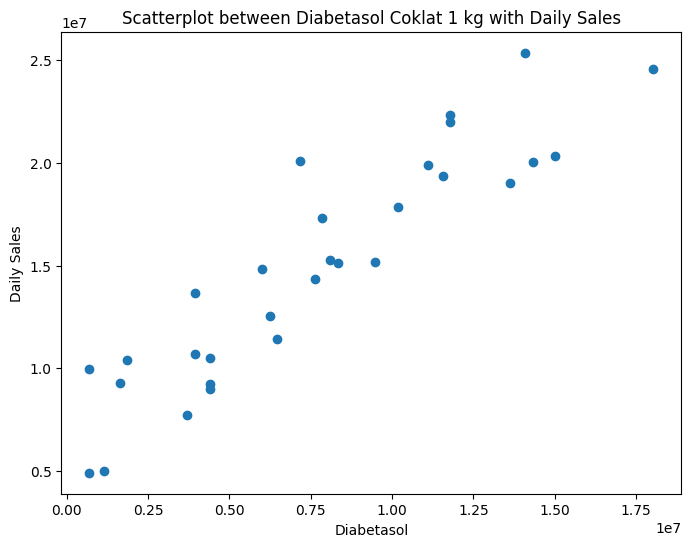

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(df['Diabetasol Coklat 1 kg'],df['Daily Sales'])
plt.xlabel('Diabetasol')
plt.ylabel('Daily Sales')
plt.title('Scatterplot between Diabetasol Coklat 1 kg with Daily Sales')
plt.show()

<Figure size 800x600 with 0 Axes>

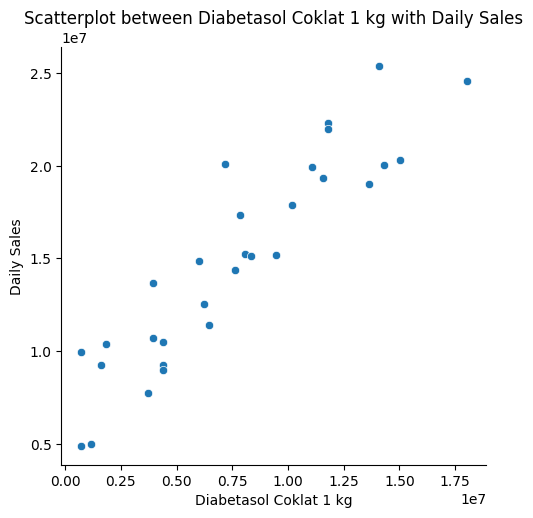

In [35]:
plt.figure(figsize=(8,6))
sns.pairplot(df, x_vars=['Diabetasol Coklat 1 kg'], y_vars=['Daily Sales'], height=5, kind='scatter')
plt.title('Scatterplot between Diabetasol Coklat 1 kg with Daily Sales')
plt.show()

In [36]:
# delete data/row with missing values from certain columns
df_new = df.dropna(subset=['Diabetasol Coklat 1 kg'], inplace=False)

In [37]:
# assign certain columns from df_new into x and y variables
x = df_new['Diabetasol Coklat 1 kg']
y = df_new['Daily Sales']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

x_train = x_train.reshape(x_train.shape[0],1)
x_test = x_test.reshape(x_test.shape[0],1)

In [39]:
# line fitting
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
# predicting using model
y_pred = lr.predict(x_test)

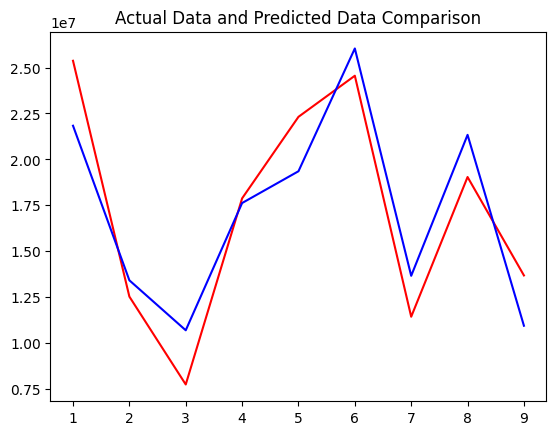

In [41]:
c = [i for i in range (1, len(y_test)+1, 1)]

plt.plot(c, y_test, color='r', linestyle='-', label ='Actual Data')
plt.plot(c, y_pred, color='b', linestyle='-', label ='Predicted Data')
plt.legend
plt.title('Actual Data and Predicted Data Comparison')
plt.show()

In [42]:
# MSE calculation
mse = mean_squared_error(y_test, y_pred)
print(f"mean squared error = {mse}")

mean squared error = 5646943705294.958


In [43]:
# Intercept and coefficient of the line
print(f"Intercept of the model: {lr.intercept_}")
print(f"Coefficient of the line = {lr.coef_}")

Intercept of the model: 6728389.623898853
Coefficient of the line = [1.0712553]
